In [364]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [365]:
#dataset=https://www.kaggle.com/datasets/gopalchettri/advertisement
address='C:/Users/adila/Downloads/archivee/advertising.csv'
add=pd.read_csv(address)

add.columns = ['Time_site', 'Age','Income_area', 'Time_internet', 'Ad_topic', 'City', 'Male_gender', 'Country','Time', 'Click']
add

,Time_site,Age,Income_area,Time_internet,Ad_topic,City,Male_gender,Country,Time,Click
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [366]:
add.Time.str.split(pat=':',expand=True)
A=add.Time.str.split(pat=':',expand=True)[0]
B=A.str.split(pat=' ',expand=True)[1]
add['Hour']=B

In [367]:
add

,Time_site,Age,Income_area,Time_internet,Ad_topic,City,Male_gender,Country,Time,Click,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,00
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,01
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,02
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,03
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,02
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,02


Now that I have the hour variable, for simplicity I would like to divide it into 3 as morning, evening and AM

In [368]:
def func(x):
    if 0 < x <= 8:
        return 'AM'
    elif 8 < x <= 16:
        return 'morning'
    return 'evening'


In [369]:
add['Hour'] = add['Hour'].astype(int)
add['time_cat'] = add['Hour'].apply(func)

In [370]:
add['time_cat'] 

0      evening
1           AM
2      evening
3           AM
4           AM
        ...   
995    evening
996         AM
997    evening
998         AM
999    evening
Name: time_cat, Length: 1000, dtype: object

For the sake of the application, I will ignore the ad_topic. I will think as this dataset comes from just one ad and it is the ad for new PureBook.

Also, for simplicity, I will ignore cities because due to the country information, we already have a lot of factors even though we do not have a very big dataset.

In [371]:
add = add.drop('City', axis=1)
add = add.drop('Ad_topic', axis=1)

# AGE

In [372]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy
from scipy import stats

In [373]:
add['Age'].describe()

count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

C:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

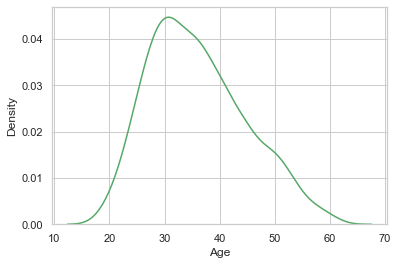

In [374]:
sns.distplot(add['Age'], hist=False, color='g')

Here we got more information about the age variable. Let's check if there is any outlier.

<AxesSubplot:xlabel='Age'>

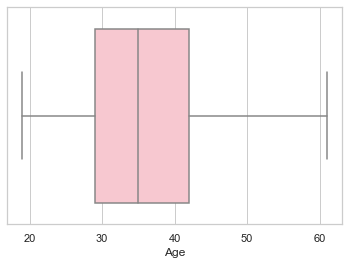

In [375]:
sns.boxplot(x=add['Age'], color='pink')

No outliers!!

Now, I want to check the relationship between age and clicking behavior. Doing that, we can get more information about the target.

In [376]:
add['Age_cat'] = pd.cut(add['Age'], bins=[0, 29, 35, 42, 62], labels=['1', '2', '3', '4' ])

<AxesSubplot:title={'center':'Age'}, xlabel='Click'>

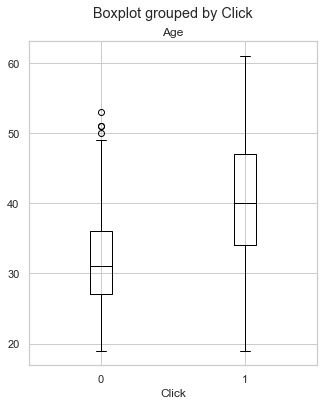

In [377]:
add.boxplot(column='Age', by='Click', figsize=(5,6), color='black')

Two information from this boxplot is immediately available, first, older people click more on the ad, second, we have some outliers in the non-clicked group

However, we can not be sure if there is a significant difference between two groups in terms of age before we check the situation. Mathematical difference does not mean statistical difference.

This is very important because if we, just because of this boxplot, decide that we should target older people for PureBook, and if there are no significant differences by groups, we would lose a lot of potential costumers.

Point biserial correlation can be used to check the relationship between one categorical and one continous variable.

In [378]:
scipy.stats.pointbiserialr(add['Click'], add['Age'])

PointbiserialrResult(correlation=0.4925312655560377, pvalue=3.129808309289353e-62)

There is a significant correlation between age and clicks on ads. I also want to check this on age_cat variable

In [379]:
table=pd.crosstab(add['Click'],add['Age_cat'])
from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(table.values)
print('Chi-square %0.3f p_value %0.3f'%(chi2,p))

Chi-square 240.228 p_value 0.000


Chi square analysis also confirms this fact. It is safe to assume a relationship between age and clicking on ad

# GENDER

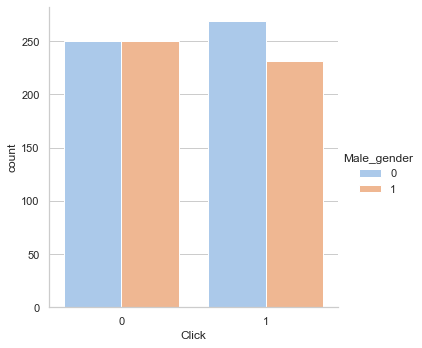

In [380]:
sns.catplot(x="Click", kind="count", hue="Male_gender",palette="pastel", data=add)

Gender and clicking behavior seems independent but we can still check it will chi square.

In [381]:
table=pd.crosstab(add['Click'],add['Male_gender'])
chi2,p,dof,expected=chi2_contingency(table.values)
print('Chi-square %0.3f p_value %0.3f'%(chi2,p))

Chi-square 1.298 p_value 0.255


Chi square analysis confirmed this.

# Country

In [382]:
add['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [383]:
add['Country'].value_counts()[:12]

France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Senegal           8
Liberia           8
Australia         8
South Africa      8
Micronesia        8
Cyprus            8
Afghanistan       8
Name: Country, dtype: int64

# Time spending on website vs time spending on the internet

In [384]:
r = np.corrcoef(add['Time_site'], add['Time_internet'])

In [385]:
scipy.stats.pearsonr(add['Time_site'], add['Time_internet'])

(0.5186584753371861, 6.01204966130329e-70)

There is a significant relationship between time spent on the internet and time spent in the website.

# CLICK PREDICTION USING SVM

In [386]:
X=add.drop('Time',axis=1)
X=X.drop('Hour',axis=1)
X=X.drop('Country',axis=1)
K=pd.get_dummies(add['time_cat'])
XX=pd.concat([X, K], axis=1, verify_integrity=True)
XX=XX.drop('time_cat',axis=1)
XX

,Time_site,Age,Income_area,Time_internet,Male_gender,Click,Age_cat,AM,evening,morning
0,68.95,35,61833.90,256.09,0,0,2,0,1,0
1,80.23,31,68441.85,193.77,1,0,2,1,0,0
2,69.47,26,59785.94,236.50,0,0,1,0,1,0
3,74.15,29,54806.18,245.89,1,0,1,1,0,0
4,68.37,35,73889.99,225.58,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,2,0,1,0
996,51.30,45,67782.17,134.42,1,1,4,1,0,0
997,51.63,51,42415.72,120.37,1,1,4,0,1,0
998,55.55,19,41920.79,187.95,0,0,1,1,0,0


In [387]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20)

In [388]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [389]:
y_pred = svclassifier.predict(X_test)

In [390]:
from sklearn.metrics import classification_report, confusion_matrix
P=confusion_matrix(y_test,y_pred)
print("the accuracy is:",(P[0,0]+P[1,1])/(P[0,0]+P[1,1]+P[0,1]+P[1,0]))

the accuracy is: 0.95


It is possible to predict if someone will click on the purebook ad or not with 97% of accuracy. Since this is an amazing accuracy level, in this case, it makes a lot of sense to select a target group. 

# K MEANS CUSTOMER SEGMENTATION

In [391]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [392]:
col_names = ['Time_site', 'Age', 'Income_area', 'Time_internet']
features = add[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features
newdf=pd.concat([XX.iloc[:,4:], scaled_features], axis=1, verify_integrity=True)


In [393]:

SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

C:\Users\adila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Error')

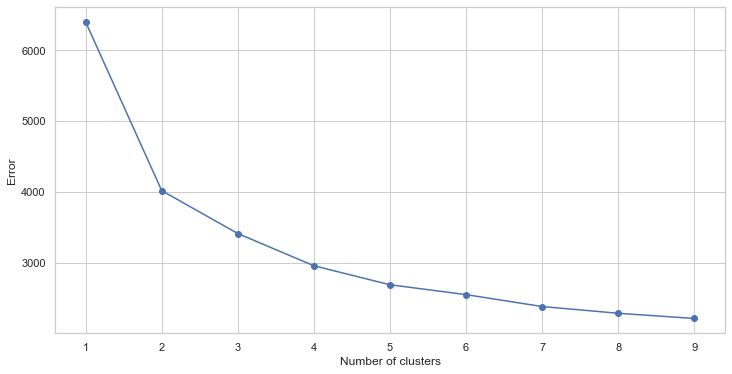

In [394]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Error')

In [395]:
kmeans = KMeans( n_clusters = 2, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.3393620850974385


C:\Users\adila\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


In [396]:
clusters = kmeans.fit_predict(newdf.iloc[:,1:])
newdf["label"] = clusters

In [397]:
newdf

,Male_gender,Click,Age_cat,AM,evening,morning,Time_site,Age,Income_area,Time_internet,label
0,0,0,2,0,1,0,0.249267,-0.114905,0.509691,1.734030,0
1,1,0,2,1,0,0,0.961132,-0.570425,1.002530,0.313805,0
2,0,0,1,0,1,0,0.282083,-1.139826,0.356949,1.287589,0
3,1,0,1,1,0,0,0.577432,-0.798185,-0.014456,1.501580,0
4,0,0,2,1,0,0,0.212664,-0.114905,1.408868,1.038731,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,2,0,1,0,0.502963,-0.684305,1.222006,0.651314,0
996,1,1,4,1,0,0,-0.864601,1.023896,0.953329,-1.038735,1
997,1,1,4,0,1,0,-0.843775,1.707176,-0.938570,-1.358924,1
998,0,0,1,1,0,0,-0.596389,-1.936986,-0.975484,0.181172,0


In [398]:
avg_newdf = newdf.groupby(['label']).mean()
avg_newdf[['Time_site', 'Age', 'Income_area', 'Time_internet']]

,Time_site,Age,Income_area,Time_internet
label,,,,
0,0.592430,-0.592841,0.390085,0.625004
1,-0.782118,0.782660,-0.514985,-0.825122


In [399]:
avg_newdf

,Male_gender,Click,AM,evening,morning,Time_site,Age,Income_area,Time_internet
label,,,,,,,,,
0,0.483304,0.144112,0.325132,0.363796,0.311072,0.592430,-0.592841,0.390085,0.625004
1,0.477958,0.969838,0.341067,0.334107,0.324826,-0.782118,0.782660,-0.514985,-0.825122


In [400]:
add['label']=newdf['label']

In [401]:
avg_newdf2 = add.groupby(['label']).mean()
avg_newdf2[['Time_site', 'Age', 'Income_area', 'Time_internet']]

,Time_site,Age,Income_area,Time_internet
label,,,,
0,74.387663,30.803163,60230.235589,207.425536
1,52.607007,42.881671,48095.118399,143.793434


According to this table, the cluster who is more likely to click on the ad is older, they live in a lower income area and they spend less time both in the website and the internet. Age and time on the internet could be also related.

In [402]:
scipy.stats.pearsonr(add['Time_site'], add['Age'])

(-0.3315133427865839, 4.446422589440039e-27)

In [403]:
scipy.stats.pearsonr(add['Time_internet'], add['Age'])

(-0.3672085601473587, 2.7873841543326817e-33)

Due to this already existing correlation, I would like to do an svm analysis again, excluding time on the website and time on the internet

In [404]:
XX=XX.drop('Time_internet',axis=1)
XX=XX.drop('Time_site',axis=1)
XX

,Age,Income_area,Male_gender,Click,Age_cat,AM,evening,morning
0,35,61833.90,0,0,2,0,1,0
1,31,68441.85,1,0,2,1,0,0
2,26,59785.94,0,0,1,0,1,0
3,29,54806.18,1,0,1,1,0,0
4,35,73889.99,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...
995,30,71384.57,1,1,2,0,1,0
996,45,67782.17,1,1,4,1,0,0
997,51,42415.72,1,1,4,0,1,0
998,19,41920.79,0,0,1,1,0,0


In [405]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20)

In [406]:
svclassifier = SVC(kernel='linear', C=0.9)
svclassifier.fit(X_train, y_train,)

SVC(C=0.9, kernel='linear')

In [407]:
y_pred = svclassifier.predict(X_test)

In [408]:
P=confusion_matrix(y_test,y_pred)
print("The accuracy is:",(P[0,0]+P[1,1])/(P[0,0]+P[1,1]+P[0,1]+P[1,0]))

The accuracy is: 0.75


Now I want to see if age and income are enough to create a solid model. Gender and website usage time seems unimportant so I want to see if we can create a good model using only age and area income information.

In [409]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(XX.iloc[:,0:2], y, test_size = 0.20)

In [410]:
svclassifier = SVC(kernel='linear', C=0.9)
svclassifier.fit(X_train, y_train,)

SVC(C=0.9, kernel='linear')

In [411]:
y_pred = svclassifier.predict(X_test)

In [412]:
P=confusion_matrix(y_test,y_pred)
print("The accuracy is:",(P[0,0]+P[1,1])/(P[0,0]+P[1,1]+P[0,1]+P[1,0]))

The accuracy is: 0.755


# Model Evaluation

Model 1, accuracy=0.95
Model 2, accuracy=0.75
Model 3, accuracy=0.755

Although we have a clear winner, I would suggest the company to use either Model 1 or Model 3, after more tests. Although model 1 clearly wins, the result could be biased due to multicollinearity. Also, there could be overfitting. Model 3, although it has less accuracy, it makes this prediction using only 2 variables, which means it is more efficient and fast. More tests needed for a decision, however, both models seems to be good at predicting clicking behavior. According to these models, people who are older and live in a lower income area should be targeted for more clicks and more sales. Thanks!!